In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import datetime
from math import floor
from sklearn.ensemble import RandomForestClassifier
import pickle
from shutil import copyfile
import matplotlib.pyplot as plt


In [3]:
import sys
import os
import tkinter as tk
from tkinter import filedialog

# Get path of common model code and add it to the python path variable
curr_dir = !echo %cd% 

init_common_dir = curr_dir[0]
common_model_dir = filedialog.askdirectory(initialdir = init_common_dir,
                                         title = "Choose current the Common_Model_Code directory...")

sys.path.insert(0, common_model_dir)
from class_feature_selection import perform_feat_sel_models
from class_model_creation import model_data, perform_grid_search, create_smote_data, create_under_data



In [4]:
import warnings
warnings.filterwarnings("ignore")

pd.options.mode.chained_assignment = None


User input variables

In [5]:
# Get files needed
train_data_file = filedialog.askopenfilename(initialdir = \
                                             'U:\\Source Files\\Data Analytics\\Data-Science\\Data\\Phone_Quality_Model\\',
                                         title = "Choose training data file...")
train_target_file = filedialog.askopenfilename(title = "Choose training target file...")
test_data_file = filedialog.askopenfilename(title = "Choose testing data file...")
test_target_file = filedialog.askopenfilename(title = "Choose testing target file...")

init_save_path = 'U:\\Source Files\\Data Analytics\\Data-Science\\Data\\Phone_Quality_Model\\'
base_path = filedialog.askdirectory(initialdir = init_save_path,
                                         title = "Choose base save directory...")
base_path = base_path.replace("/", "\\")
base_path += "\\"


Assign file path variables

In [6]:
model_base_name = 'Optimal_RF_Model_Precision'


Assign date and time to variable

In [7]:
current_time = datetime.datetime.now()
start_time_str = current_time.strftime("%Y-%m-%d")

Assign model and data paths

In [8]:
model_path = base_path + 'Model\\'

if not os.path.exists(model_path):
    os.mkdir(model_path)
    
model_res_path = model_path + start_time_str + '_' + model_base_name + '\\'

if not os.path.exists(model_res_path):
    os.mkdir(model_res_path)

Import Training Data

In [9]:
train_data = pd.read_csv(train_data_file, delimiter=",", index_col = 0, header = 0)
train_target = pd.read_csv(train_target_file, delimiter=",", index_col = 0, header = 0)

In [10]:
train_data.shape

(40507, 396)

In [11]:
train_target.shape

(40507, 1)

Import Testing Data

In [12]:
test_data = pd.read_csv(test_data_file, delimiter=",", index_col = 0, header = 0)
test_target = pd.read_csv(test_target_file, delimiter=",", index_col = 0, header = 0)

In [13]:
test_data.shape

(10127, 396)

In [14]:
test_target.shape

(10127, 1)

Check training and testing variables

In [15]:
num_rows = train_data.shape[0] + 1
num_cols = train_data.shape[1] + 1
pd.set_option('max_rows', num_rows)
pd.set_option('max_columns', num_cols)
np.set_printoptions(threshold=np.inf)

Assign variables needed for feature selection

In [16]:
score_thresh = 0.05
var_buffer_perc = 0.01
perc_vals = list(range(5, 105, 5))
thresh_vals = list(np.arange(0.1, 1.1, 0.1))
step_val = 0.1

num_features = train_data.shape[1]
num_feat_steps = 20
k_step_sz = num_features / num_feat_steps
k_max = num_features + k_step_sz
k_vals = list(np.arange(1, k_max, k_step_sz).astype('int'))

Assign variables needed for modeling

In [17]:
rand_st = 45
cv_num = 5
cv_scorers = {'accuracy': 'accuracy', 'roc_auc': 'roc_auc', 'precision': 'precision', 'recall': 'recall', 'f1': 'f1'}
metric_fcns = ['accuracy_score', 'roc_auc_score', 'precision_score', 'recall_score', 'f1_score']
main_scorer = 'precision'


Create base model object (all parameters specified are default values)

In [18]:
base_model = RandomForestClassifier(n_estimators = 100, max_depth = None, 
                             min_samples_split = 3, criterion = 'entropy', 
                             random_state = rand_st, class_weight = 'balanced')

Assign variables needed for grid search

In [19]:
n_estimators = [50, 100, 250]
max_depth = [3, 5, 7, 10]
min_samples_split = [3, 10, 20]
criterion = ['entropy', 'gini']
class_weight = [None, 'balanced', 'balanced_subsample']

grid_params = {
    'criterion': criterion,
    'max_depth': max_depth,
    'n_estimators': n_estimators,
    'min_samples_split': min_samples_split,
    'class_weight': class_weight
}


Create model object for grid search optimization

In [20]:
grid_model = RandomForestClassifier(random_state = rand_st)


Create base model with all features

*****************************************************************************************
************************* Training Set Cross-Validation Results *************************
*****************************************************************************************


CV  test_accuracy : 0.727528631148081 +/- 0.007632088608530644
CV  test_f1 : 0.7792862059876617 +/- 0.007392586942963072
CV  test_precision : 0.7468744250955892 +/- 0.007229972809968344
CV  test_recall : 0.814700641625825 +/- 0.015991654677918254
CV  test_roc_auc : 0.7773774330863882 +/- 0.008828482559575366
CV Runtime: 80.65229678153992


*****************************************************************************************
******************************* Full Training Set Results *******************************
*****************************************************************************************




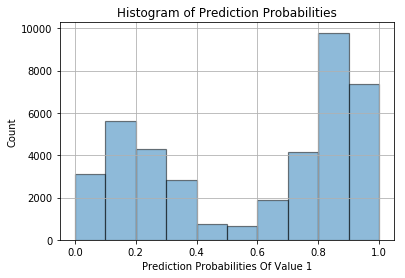

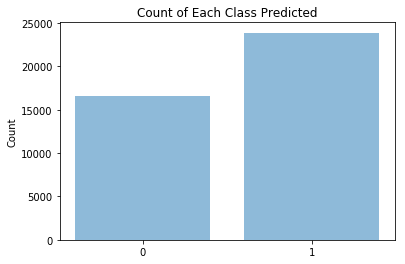

Number of 0 predictions: 16632
Number of 1 predictions: 23875
Percent of predictions with value 0: 0.4105956995087269
Percent of predictions with value 1: 0.5894043004912731


------------------------------------------------------------
--- All Possible Class Threshold Probabilities ROC Curve ---
------------------------------------------------------------


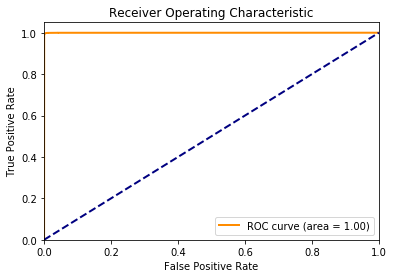



---------------------------------------
--- Actual Class Prediction Results ---
---------------------------------------


Model Prediction Scores
-----------------------
accuracy_score : 0.9969141136099934
f1_score : 0.9973845542234219
precision_score : 0.998282722513089
recall_score : 0.9964880006689523
roc_auc_score : 0.9970082416992359


Model Prediction Classificaton Table
------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     16589
           1       1.00      1.00      1.00     23918

    accuracy                           1.00     40507
   macro avg       1.00      1.00      1.00     40507
weighted avg       1.00      1.00      1.00     40507



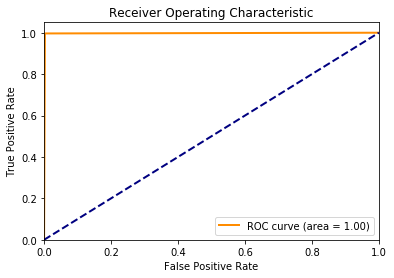

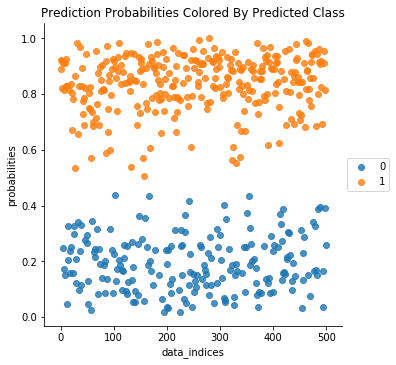

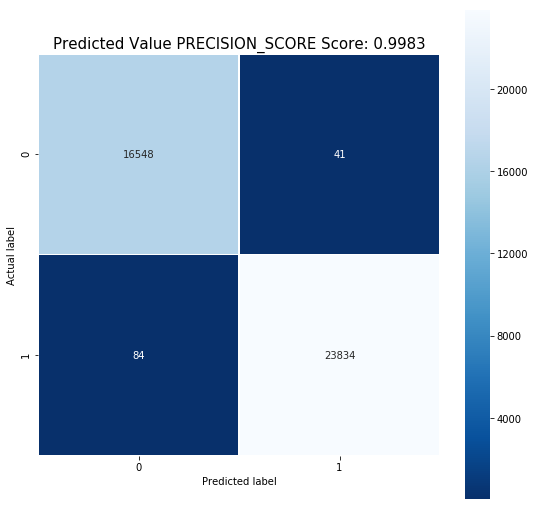



*****************************************************************************************
********************************** Testing Set Results **********************************
*****************************************************************************************


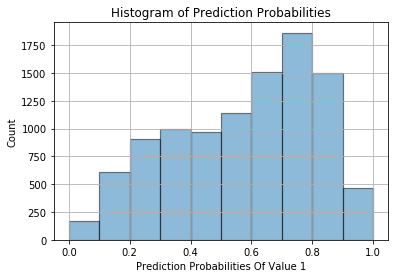

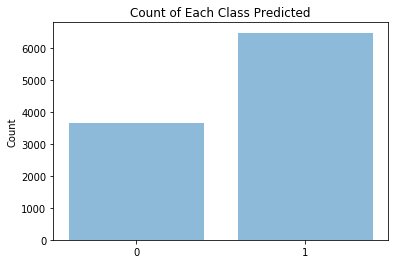

Number of 0 predictions: 3654
Number of 1 predictions: 6473
Percent of predictions with value 0: 0.3608176162733287
Percent of predictions with value 1: 0.6391823837266712


------------------------------------------------------------
--- All Possible Class Threshold Probabilities ROC Curve ---
------------------------------------------------------------


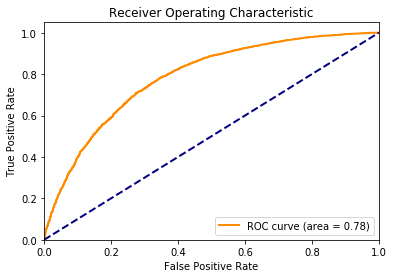



---------------------------------------
--- Actual Class Prediction Results ---
---------------------------------------


Model Prediction Scores
-----------------------
accuracy_score : 0.7319048089266318
f1_score : 0.7819802457239219
precision_score : 0.7522014521860034
recall_score : 0.8142140468227425
roc_auc_score : 0.7137142093289021


Model Prediction Classificaton Table
------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.61      0.65      4147
           1       0.75      0.81      0.78      5980

    accuracy                           0.73     10127
   macro avg       0.72      0.71      0.72     10127
weighted avg       0.73      0.73      0.73     10127



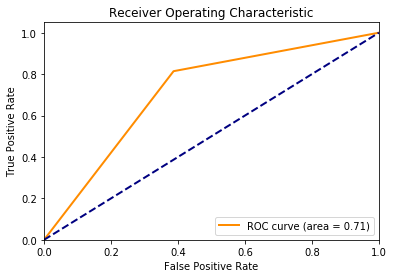

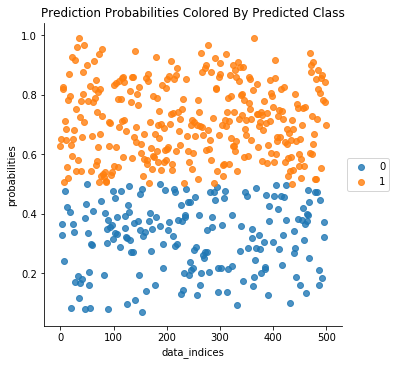

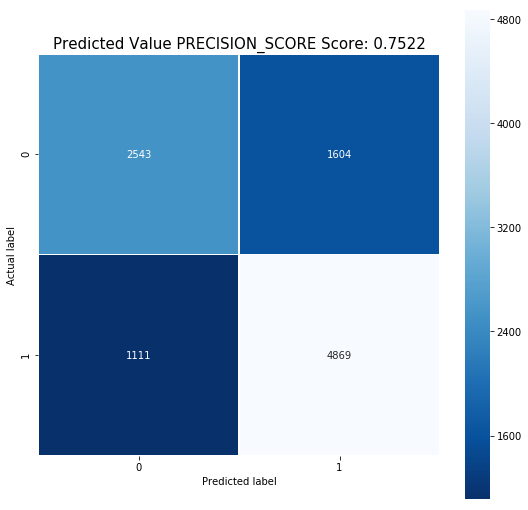

In [21]:
base_fit_model, base_pred_dict, base_score_dict = model_data(train_data, train_target, test_data, test_target, base_model,  
               cv_scorers, cv_num, metric_fcns, main_scorer)

Perform feature selection

-- Low Variance Filter Feature Selection --
Thresholds Selected: 0.1
Selected Model CV Mean  test_accuracy  Score: 0.7118025614264479
Selected Model CV  test_accuracy  Deviation: 0.010756293843664265
Selected Model CV Mean  test_f1  Score: 0.76735500922156
Selected Model CV  test_f1  Deviation: 0.0093212736895238
Selected Model CV Mean  test_precision  Score: 0.7331311308049947
Selected Model CV  test_precision  Deviation: 0.010079238343821479
Selected Model CV Mean  test_recall  Score: 0.8050004562563764
Selected Model CV  test_recall  Deviation: 0.017043763722260682
Selected Model CV Mean  test_roc_auc  Score: 0.7565626303988765
Selected Model CV  test_roc_auc  Deviation: 0.010632943966154213
Number of Original Features: 396
Number of Selected Features: 37
Selected Features:
['doctor_age_yrs', 'phone_age_yrs', 'yop_yrs', 'hist_ent_all_phn_count', 'curr_ent_all_phn_count', 'curr_usg_all_phn_count', 'area_state_match', 'pcp_0', 'pcp_1', 'yop_3', 'yop_4', 'ppd_address_type_1', 'ppd_addr

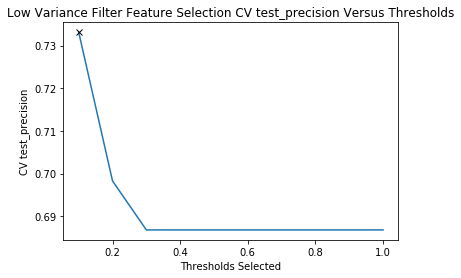



-- Model Wrapper Feature Selection --
Selected Model CV Mean  test_accuracy  Score: 0.7238500942305561
Selected Model CV  test_accuracy  Deviation: 0.008110143373224866
Selected Model CV Mean  test_f1  Score: 0.7772976541087331
Selected Model CV  test_f1  Deviation: 0.007831153580385766
Selected Model CV Mean  test_precision  Score: 0.7419566095873249
Selected Model CV  test_precision  Deviation: 0.0077902232532630405
Selected Model CV Mean  test_recall  Score: 0.8162474031844947
Selected Model CV  test_recall  Deviation: 0.017256154221936982
Selected Model CV Mean  test_roc_auc  Score: 0.7726209230410269
Selected Model CV  test_roc_auc  Deviation: 0.009818252863086655
Number of Original Features: 396
Number of Selected Features: 86
Selected Features:
['doctor_age_yrs', 'phone_age_yrs', 'yop_yrs', 'hist_ent_id_phn_count', 'hist_ent_all_phn_count', 'curr_ent_all_phn_count', 'curr_usg_all_phn_count', 'area_state_match', 'lic_state_match_0', 'lic_state_match_1', 'pcp_0', 'pcp_1', 'yop_3

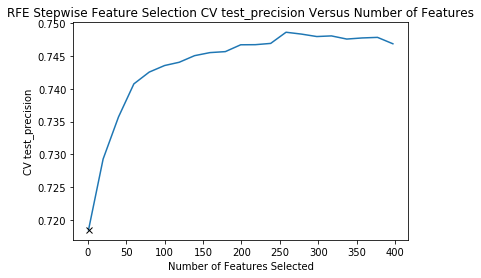



-- Univariate Chi-Sq Feature Selection --
Percent of Features Selected: 5
Selected Model CV Mean  test_accuracy  Score: 0.6969164428188896
Selected Model CV  test_accuracy  Deviation: 0.007344275504674351
Selected Model CV Mean  test_f1  Score: 0.7529460602158224
Selected Model CV  test_f1  Deviation: 0.006532453862377444
Selected Model CV Mean  test_precision  Score: 0.7258245189110425
Selected Model CV  test_precision  Deviation: 0.007283379930866289
Selected Model CV Mean  test_recall  Score: 0.7822143223246769
Selected Model CV  test_recall  Deviation: 0.012534206810503877
Selected Model CV Mean  test_roc_auc  Score: 0.7372589116486223
Selected Model CV  test_roc_auc  Deviation: 0.01126043921645782
Number of Original Features: 396
Number of Selected Features: 20
Selected Features:
['doctor_age_yrs', 'phone_age_yrs', 'yop_yrs', 'hist_ent_all_phn_count', 'curr_ent_all_phn_count', 'area_state_match', 'lic_state_match_0', 'ppd_address_type_1', 'ppd_address_type_2', 'ppd_gender_1', 'p

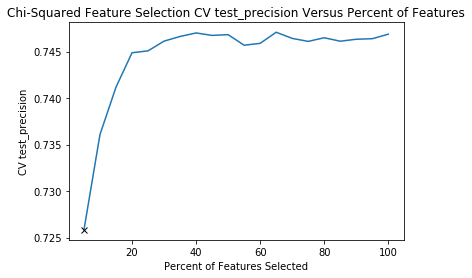



-- Mutual Information Feature Selection --
Percent of Features Selected: 5
Selected Model CV Mean  test_accuracy  Score: 0.6898807741607316
Selected Model CV  test_accuracy  Deviation: 0.009119951582105696
Selected Model CV Mean  test_f1  Score: 0.746667073924665
Selected Model CV  test_f1  Deviation: 0.007461207668160438
Selected Model CV Mean  test_precision  Score: 0.7212376992251872
Selected Model CV  test_precision  Deviation: 0.010089130068817042
Selected Model CV Mean  test_recall  Score: 0.7740196169264473
Selected Model CV  test_recall  Deviation: 0.014118011376403167
Selected Model CV Mean  test_roc_auc  Score: 0.7272090376109579
Selected Model CV  test_roc_auc  Deviation: 0.010346703626332188
Number of Original Features: 396
Number of Selected Features: 20
Selected Features:
['doctor_age_yrs', 'phone_age_yrs', 'hist_ent_all_phn_count', 'curr_usg_all_phn_count', 'area_state_match', 'lic_state_match_0', 'lic_state_match_1', 'dpc_1', 'pcp_1', 'ppd_address_type_2', 'ppd_pe_cd_

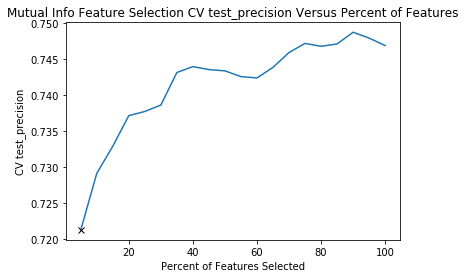



-- Anova F Statistic Feature Selection --
Percent of Features Selected: 5
Selected Model CV Mean  test_accuracy  Score: 0.6564296099565381
Selected Model CV  test_accuracy  Deviation: 0.0061299501572275586
Selected Model CV Mean  test_f1  Score: 0.6936056611429586
Selected Model CV  test_f1  Deviation: 0.006730468647163355
Selected Model CV Mean  test_precision  Score: 0.7325255157351117
Selected Model CV  test_precision  Deviation: 0.004653303473388541
Selected Model CV Mean  test_recall  Score: 0.6586252907978858
Selected Model CV  test_recall  Deviation: 0.009698317676738871
Selected Model CV Mean  test_roc_auc  Score: 0.6987477675031395
Selected Model CV  test_roc_auc  Deviation: 0.007476940265828013
Number of Original Features: 396
Number of Selected Features: 20
Selected Features:
['phone_age_yrs', 'area_state_match', 'lic_state_match_0', 'lic_state_match_1', 'pcp_0', 'pcp_1', 'ppd_address_type_1', 'ppd_address_type_2', 'ppd_gender_1', 'ppd_gender_2', 'ppd_pe_cd_11', 'ppd_pe_cd

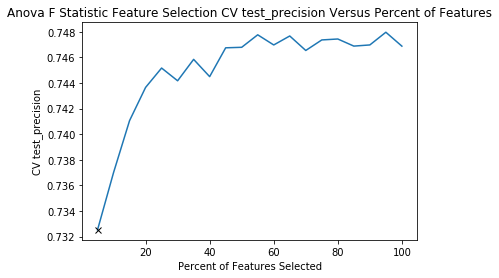



Scores Per Feature Selection Type:
  fs_type  opt_score  num_vars
0     lvf   0.733131        37
0    wrap   0.741957        86
0    step   0.718452         1
0   chisq   0.725825        20
0  mutinf   0.721238        20
0  anovaf   0.732526        20


Optimal Feature Selection Choice Based On  precision :
FS Type:  anovaf
FS Score:  0.7325255157351117




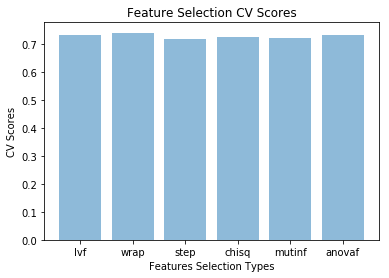

In [22]:
results_dict, opt_fs_dict, all_scores_df = perform_feat_sel_models(train_data, train_target, test_data, 
                            base_model, perc_vals, k_vals, thresh_vals, 
                            cv_num, cv_scorers, main_scorer, score_thresh, var_buffer_perc, step_val)

Extract feature selection training and testing datasets

In [23]:
fs_train_data = opt_fs_dict['train_data']
fs_test_data = opt_fs_dict['test_data']

Build base model with only features chosen from feature selection

*****************************************************************************************
************************* Training Set Cross-Validation Results *************************
*****************************************************************************************


CV  test_accuracy : 0.6564296099565381 +/- 0.0061299501572275586
CV  test_f1 : 0.6936056611429586 +/- 0.006730468647163355
CV  test_precision : 0.7325255157351117 +/- 0.004653303473388541
CV  test_recall : 0.6586252907978858 +/- 0.009698317676738871
CV  test_roc_auc : 0.6987477675031395 +/- 0.007476940265828013
CV Runtime: 21.04451584815979


*****************************************************************************************
******************************* Full Training Set Results *******************************
*****************************************************************************************




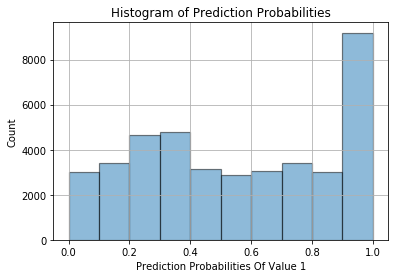

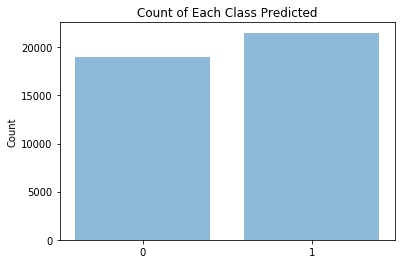

Number of 0 predictions: 19001
Number of 1 predictions: 21506
Percent of predictions with value 0: 0.46907941837213324
Percent of predictions with value 1: 0.5309205816278668


------------------------------------------------------------
--- All Possible Class Threshold Probabilities ROC Curve ---
------------------------------------------------------------


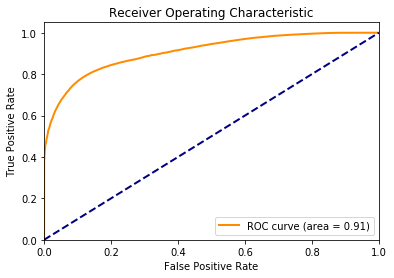



---------------------------------------
--- Actual Class Prediction Results ---
---------------------------------------


Model Prediction Scores
-----------------------
accuracy_score : 0.8281284716221887
f1_score : 0.8467330045790771
precision_score : 0.8942155677485353
recall_score : 0.8040387992307049
roc_auc_score : 0.8334498655867794


Model Prediction Classificaton Table
------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.86      0.80     16589
           1       0.89      0.80      0.85     23918

    accuracy                           0.83     40507
   macro avg       0.82      0.83      0.83     40507
weighted avg       0.84      0.83      0.83     40507



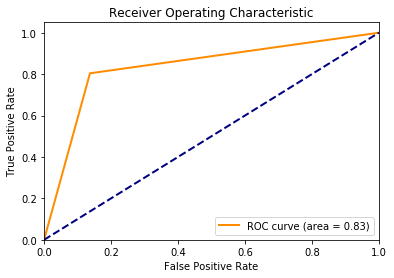

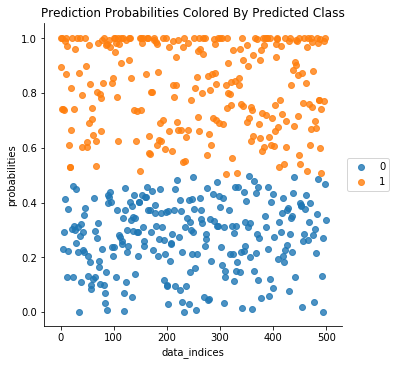

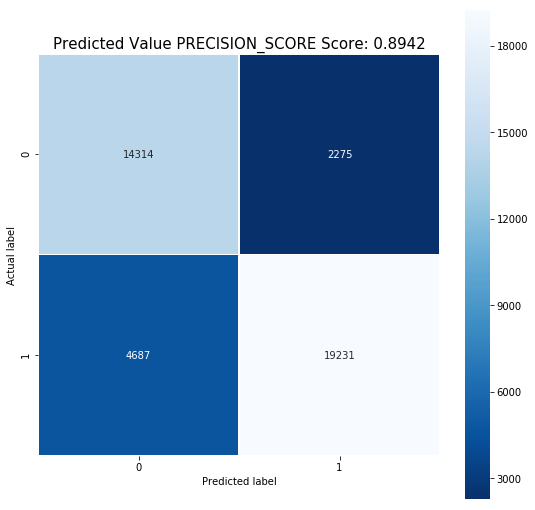



*****************************************************************************************
********************************** Testing Set Results **********************************
*****************************************************************************************


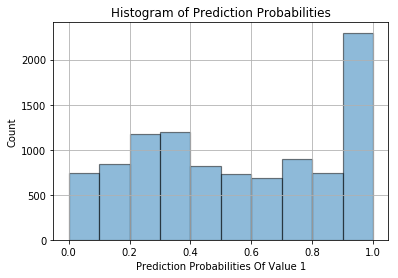

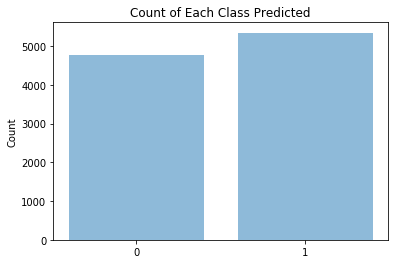

Number of 0 predictions: 4778
Number of 1 predictions: 5349
Percent of predictions with value 0: 0.47180803791843584
Percent of predictions with value 1: 0.5281919620815642


------------------------------------------------------------
--- All Possible Class Threshold Probabilities ROC Curve ---
------------------------------------------------------------


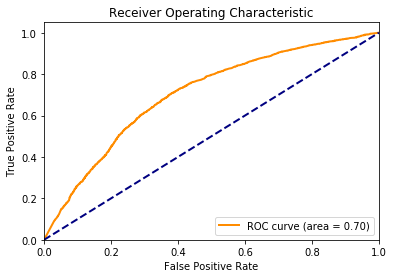



---------------------------------------
--- Actual Class Prediction Results ---
---------------------------------------


Model Prediction Scores
-----------------------
accuracy_score : 0.6604127579737336
f1_score : 0.696442757524936
precision_score : 0.7375210319685923
recall_score : 0.6596989966555183
roc_auc_score : 0.6605705014625554


Model Prediction Classificaton Table
------------------------------------
              precision    recall  f1-score   support

           0       0.57      0.66      0.61      4147
           1       0.74      0.66      0.70      5980

    accuracy                           0.66     10127
   macro avg       0.66      0.66      0.66     10127
weighted avg       0.67      0.66      0.66     10127



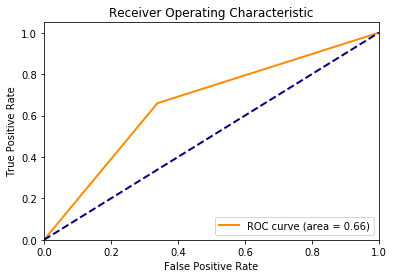

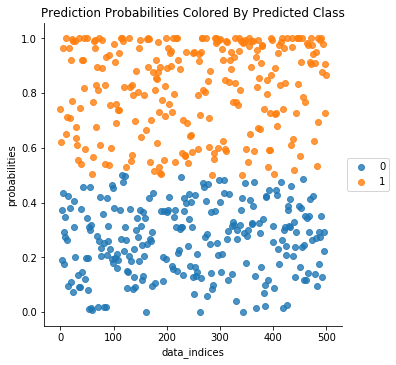

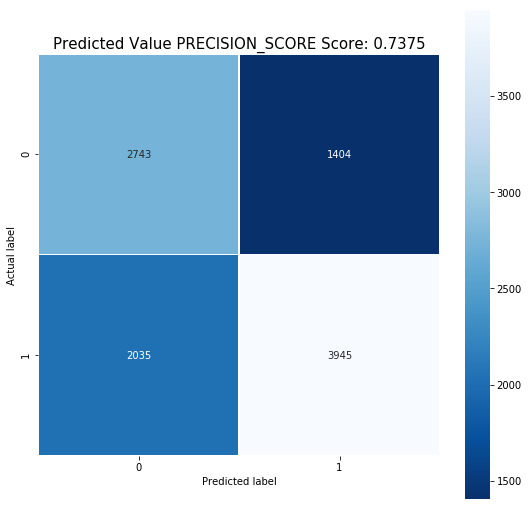

In [24]:
fs_fit_model, fs_pred_dict, fs_score_dict = model_data(fs_train_data, train_target, fs_test_data, test_target, base_model,
               cv_scorers, cv_num, metric_fcns, main_scorer)

Save off model from feature selection

In [25]:
pred_filename = model_res_path + start_time_str + '_' + model_base_name + '_Base_FS.sav'
pickle.dump(fs_fit_model, open(pred_filename, 'wb'))

Perform grid search on chosen feature selection dataset

*** Grid Search ***
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1080 out of 1080 | elapsed: 31.9min finished


Grid Search Runtime: 1918.747216463089


Grid Search Optimal Parameters: {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}
Grid Search Optimal Parameter Score: 0.750584358992671


Optimal Model Parameter Settings:
RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=45, verbose=0, warm_start=False)




All Model Results
-----------------


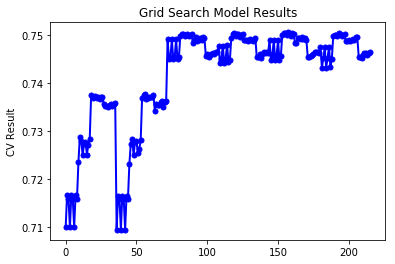

In [26]:
opt_model, gs = perform_grid_search(grid_model, fs_train_data, train_target, grid_params, main_scorer, cv_num)

Evaluate performance of optimal model chosen

*****************************************************************************************
************************* Training Set Cross-Validation Results *************************
*****************************************************************************************


CV  test_accuracy : 0.7018292032723986 +/- 0.005288174067149663
CV  test_f1 : 0.7459462830497976 +/- 0.0066502971184486245
CV  test_precision : 0.7505842025649795 +/- 0.004160230667881238
CV  test_recall : 0.7414082379273864 +/- 0.013991604077900528
CV  test_roc_auc : 0.7441932708866739 +/- 0.008360885738369904
CV Runtime: 10.063337087631226


*****************************************************************************************
******************************* Full Training Set Results *******************************
*****************************************************************************************




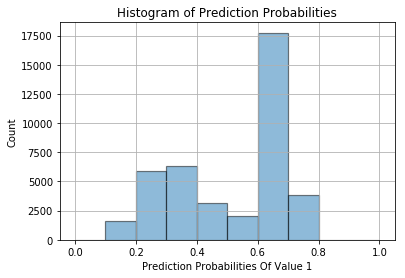

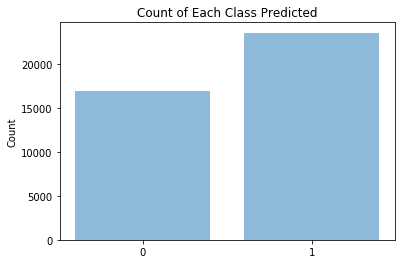

Number of 0 predictions: 16953
Number of 1 predictions: 23554
Percent of predictions with value 0: 0.418520255758264
Percent of predictions with value 1: 0.581479744241736


------------------------------------------------------------
--- All Possible Class Threshold Probabilities ROC Curve ---
------------------------------------------------------------


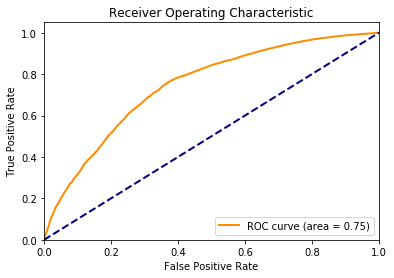



---------------------------------------
--- Actual Class Prediction Results ---
---------------------------------------


Model Prediction Scores
-----------------------
accuracy_score : 0.7016811909052756
f1_score : 0.7454499494438825
precision_score : 0.7512099855650844
recall_score : 0.7397775733757003
roc_auc_score : 0.6932657232120529


Model Prediction Classificaton Table
------------------------------------
              precision    recall  f1-score   support

           0       0.63      0.65      0.64     16589
           1       0.75      0.74      0.75     23918

    accuracy                           0.70     40507
   macro avg       0.69      0.69      0.69     40507
weighted avg       0.70      0.70      0.70     40507



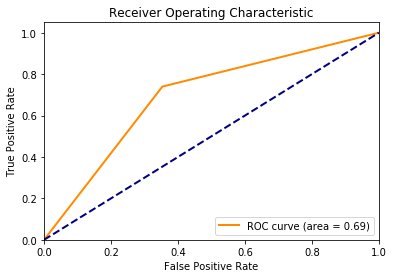

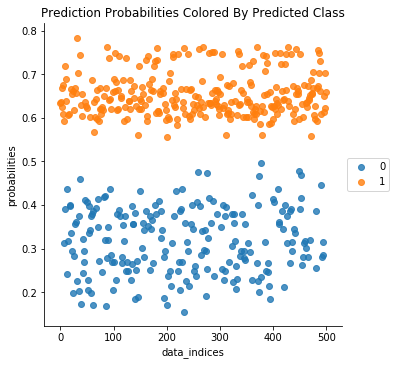

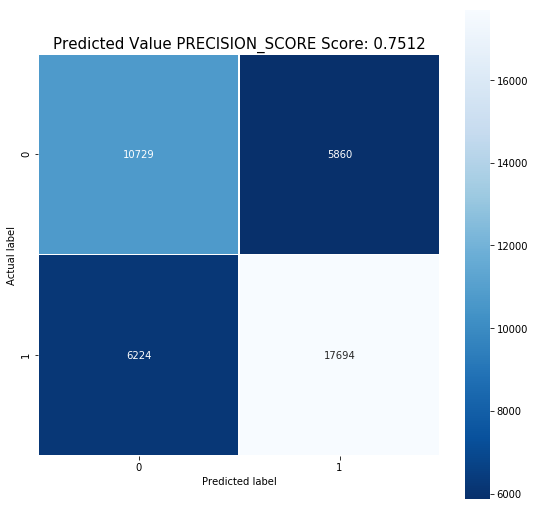



*****************************************************************************************
********************************** Testing Set Results **********************************
*****************************************************************************************


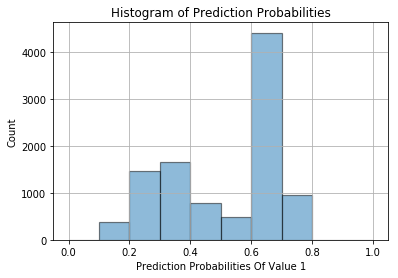

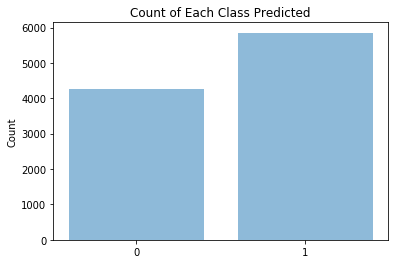

Number of 0 predictions: 4274
Number of 1 predictions: 5853
Percent of predictions with value 0: 0.4220400908462526
Percent of predictions with value 1: 0.5779599091537474


------------------------------------------------------------
--- All Possible Class Threshold Probabilities ROC Curve ---
------------------------------------------------------------


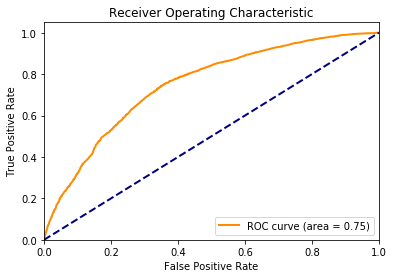



---------------------------------------
--- Actual Class Prediction Results ---
---------------------------------------


Model Prediction Scores
-----------------------
accuracy_score : 0.7032684901747803
f1_score : 0.74604918448407
precision_score : 0.7541431744404579
recall_score : 0.7381270903010033
roc_auc_score : 0.6955646302722764


Model Prediction Classificaton Table
------------------------------------
              precision    recall  f1-score   support

           0       0.63      0.65      0.64      4147
           1       0.75      0.74      0.75      5980

    accuracy                           0.70     10127
   macro avg       0.69      0.70      0.69     10127
weighted avg       0.70      0.70      0.70     10127



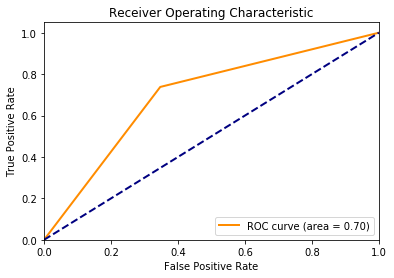

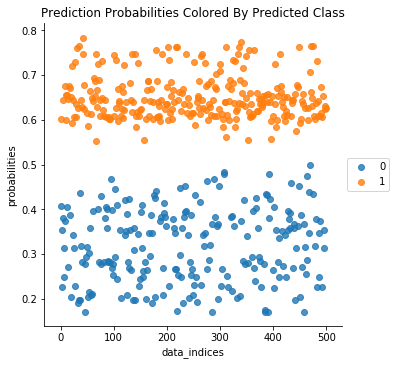

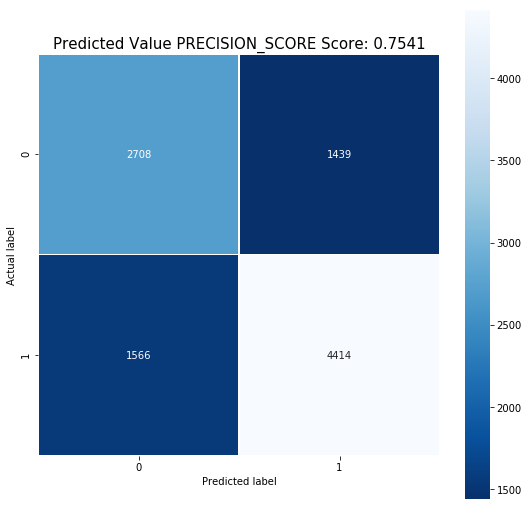

In [27]:
opt_fit_model, opt_pred_dict, opt_score_dict = model_data(fs_train_data, train_target, fs_test_data, test_target, opt_model,
               cv_scorers, cv_num, metric_fcns, main_scorer)

View model feature importance values

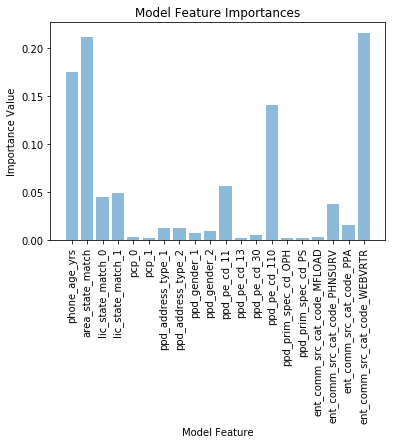

                               Importance
phone_age_yrs                    0.174533
area_state_match                 0.210874
lic_state_match_0                0.044369
lic_state_match_1                0.048362
pcp_0                            0.002809
pcp_1                            0.001724
ppd_address_type_1               0.012174
ppd_address_type_2               0.012459
ppd_gender_1                     0.007052
ppd_gender_2                     0.008769
ppd_pe_cd_11                     0.055806
ppd_pe_cd_13                     0.001802
ppd_pe_cd_30                     0.004474
ppd_pe_cd_110                    0.140323
ppd_prim_spec_cd_OPH             0.001809
ppd_prim_spec_cd_PS              0.001550
ent_comm_src_cat_code_MFLOAD     0.002670
ent_comm_src_cat_code_PHNSURV    0.036786
ent_comm_src_cat_code_PPA        0.015748
ent_comm_src_cat_code_WEBVRTR    0.215907


In [28]:
fit_cols = fs_train_data.columns.values

importance = opt_fit_model.feature_importances_
importance_df = pd.DataFrame(importance, index = fs_train_data.columns, 
                          columns = ['Importance'])
plt.bar(list(fit_cols), importance.tolist(), align = 'center', alpha = 0.5)
plt.xticks(rotation = 90)
plt.ylabel('Importance Value') 
plt.xlabel('Model Feature')
plt.title('Model Feature Importances')
plt.show()

print(importance_df)

Save model for future use

In [29]:
model_filename = model_path + start_time_str + '_' + model_base_name + '.sav'
pickle.dump(opt_fit_model, open(model_filename, 'wb'))

Save list of features used

In [30]:
var_filename = model_path + start_time_str + '_' + model_base_name + '_FeatureList.sav'
pickle.dump(fit_cols, open(var_filename, 'wb'))

Save Results

In [31]:
pred_filename = model_res_path + start_time_str + '_' + model_base_name + '_Preds.sav'
pickle.dump(opt_pred_dict, open(pred_filename, 'wb'))

In [32]:
scores_filename = model_res_path + start_time_str + '_' + model_base_name + '_Scores.sav'
pickle.dump(opt_score_dict, open(scores_filename, 'wb'))

In [33]:
end_time = datetime.datetime.now()
elapsed_time = end_time - current_time
print('Elapsed time (sec): {}'.format(elapsed_time))
print('Elapsed time (min): {}'.format((elapsed_time / 60)))
print('Elapsed time (hrs): {}'.format(((elapsed_time / 60) / 60)))

Elapsed time (sec): 3:13:01.482216
Elapsed time (min): 0:03:13.024704
Elapsed time (hrs): 0:00:03.217078
